---
# **1. Installation**
---

In [ ]:
!pip install nltk
!pip3 install flair
!pip install textblob

!pip install stanza
!pip install spacy

---
# **2. Imports**
---

### i. core

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ii. NLTK Vader Sentiment Intensity Analyzer

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
SIA = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### iii. Stanza

In [ ]:
import stanza
stanza.download('en', package='ewt', processors='tokenize,sentiment', verbose=True)
stanza.download('en', package='default', processors='tokenize,sentiment', verbose=True)
stNLP = stanza.Pipeline(processors='tokenize,sentiment', lang='en', use_gpu=True)

def stanza_funct(text):
    data = stNLP(text)
    for sentence in data.sentences:
        return sentence.sentiment

2020-08-29 04:07:45 WARNING: Can not find sentiment: ewt from official model list. Ignoring it.
2020-08-29 04:07:45 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |

2020-08-29 04:07:45 INFO: File exists: /root/stanza_resources/en/tokenize/ewt.pt.
2020-08-29 04:07:45 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-08-29 04:07:45 INFO: Downloading these customized packages for language: en (English)...
| Processor | Package |
-----------------------
| tokenize  | ewt     |
| sentiment | sstplus |
| pretrain  | ewt     |

2020-08-29 04:07:45 INFO: File exists: /root/stanza_resources/en/tokenize/ewt.pt.
2020-08-29 04:07:45 INFO: File exists: /root/stanza_resources/en/sentiment/sstplus.pt.
2020-08-29 04:07:46 INFO: File exists: /root/stanza_resources/en/pretrain/ewt.pt.
2020-08-29 04:07:46 INFO: Finished downloading models and saved to /root/stanza_resources.
2020-08

### iv. Spacy Text Categorizer

In [ ]:
import spacy
from spacy.pipeline import TextCategorizer

spNLP = spacy.load('en_core_web_sm')
textcat = spNLP.create_pipe(name='textcat', config={'exclusive_classes': True})
textcat = TextCategorizer(spNLP.vocab)

In [ ]:
text = spNLP('this is a sentence.')
#processed = textcat(text)

### v. TextBlob

In [ ]:
from textblob import TextBlob

### vi. Flair

In [ ]:
import flair
flair_sent = flair.models.TextClassifier.load('en-sentiment')

2020-08-29 04:07:50,427 loading file /root/.flair/models/sentiment-en-mix-distillbert.pt


---
# **3. Defining functions**
---

In [ ]:
def siaVader_compound(text):
    scores = SIA.polarity_scores(text)
    
    comp_score = scores['compound']
    if comp_score >= 0.05:
        str_comp = 'pos'
    elif comp_score <= -0.05:
        str_comp = 'neg'
    else: # (compound score > -0.05) and (compound score < 0.05)
        str_comp = 'neu'
    return str_comp

def siaVader_maxScore(text):
    scores = SIA.polarity_scores(text)
    
    del scores['compound']
    index = np.argmax(list(scores.values()))
    vader_MaxScore = list(scores.values())[index]
    vader_label = list(scores)[index]
    
    return vader_label

###
def siaVader_byWord(text):
    c = 0
    for n, y in enumerate(text):
        x = SIA.polarity_scores(y)
        if x['compound'] != 0.0:
            c += 1
            # print('{}. {} {}'.format(c, x, y))
            return 'pos' if x > 0.05 else 'neg'

In [ ]:
def text_blob_subjective(text):
    return TextBlob(text).sentiment

In [ ]:
def flair_lstm(text):
    x = flair.data.Sentence(text)
    flair_sent.predict(sentences=x)
    return x.labels

---

# **4. Comparing Sentiment Analyzers**

---

### **data (text)**

In [ ]:
#data = 'I love working hard! In my opinion the following sentence is a fact: done school examen! easy peasy so proud of myself!!!'
data = "I'm confident of myself but sometimes I'm unsure and unfriendly however I'm concise when I'm interested in being someone organizated who handles pressure"

### **NLTK Vader**
* VADER, has different ratings depending on the form of the word and therefore the input should not be stemmed or lemmatized.

* disadvantage of this approach is that Out of Vocab (OOV) words that the sentiment analysis tool has not seen before will not be classified as positive/negative (e.g. typos).

In [38]:
SIA.polarity_scores(data)

{'compound': -0.4404, 'neg': 0.266, 'neu': 0.559, 'pos': 0.175}

In [39]:
print([i for i in data.split()])
print([(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data.split()])

["I'm", 'confident', 'of', 'myself', 'but', 'sometimes', "I'm", 'unsure', 'and', 'unfriendly', 'however', "I'm", 'concise', 'when', "I'm", 'interested', 'in', 'being', 'someone', 'organizated', 'who', 'handles', 'pressure']
[0.0, 0.4939, 0.0, 0.0, 0.0, 0.0, 0.0, -0.25, 0.0, -0.3612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4019, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.296]


In [40]:
siaVader_compound(data)

'neg'

In [41]:
print([i for i in data.split()])
print([(lambda x: siaVader_compound(x))(x) for x in data.split()])

["I'm", 'confident', 'of', 'myself', 'but', 'sometimes', "I'm", 'unsure', 'and', 'unfriendly', 'however', "I'm", 'concise', 'when', "I'm", 'interested', 'in', 'being', 'someone', 'organizated', 'who', 'handles', 'pressure']
['neu', 'pos', 'neu', 'neu', 'neu', 'neu', 'neu', 'neg', 'neu', 'neg', 'neu', 'neu', 'neu', 'neu', 'neu', 'pos', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neg']


In [42]:
siaVader_maxScore(data)

'neu'

In [43]:
print([i for i in data.split()])
print([(lambda x: siaVader_maxScore(x))(x) for x in data.split()])

["I'm", 'confident', 'of', 'myself', 'but', 'sometimes', "I'm", 'unsure', 'and', 'unfriendly', 'however', "I'm", 'concise', 'when', "I'm", 'interested', 'in', 'being', 'someone', 'organizated', 'who', 'handles', 'pressure']
['neu', 'pos', 'neu', 'neu', 'neu', 'neu', 'neu', 'neg', 'neu', 'neg', 'neu', 'neu', 'neu', 'neu', 'neu', 'pos', 'neu', 'neu', 'neu', 'neu', 'neu', 'neu', 'neg']


## **TextBlob**
* use a bag of words classifier, but the advantage is that it includes subjetivity analysis (factual/opinated)
* it doesn't contain the heuristics that nltk has, it won't intensify or negate a sentence's sentiment

* will return the subjectivity of the text

In [ ]:
text_blob_subjective(data)

Sentiment(polarity=0.2833333333333333, subjectivity=0.6444444444444445)

In [ ]:
[(lambda x: text_blob_subjective(x))(x) for x in data.split()]

[Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.5, subjectivity=0.8333333333333334),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.1, subjectivity=0.6),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.25, subjectivity=0.5),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polar

## **Flair LSTM**
* classifier based on a character-leval LSTM. Takes a sequences of letters and words into account when predicting

* one of its biggest advantages is that it can predict a sentiment for OOV words that it has never seen before too (such as typos)

In [ ]:
flair_lstm(data)

[POSITIVE (0.9885)]

In [ ]:
print([i for i in data.split()])
[(lambda x: flair_lstm(x))(x) for x in data.split()]

["I'm", 'confident', 'of', 'myself', 'but', 'sometimes', "I'm", 'unsure', 'and', 'unfriendly', 'however', "I'm", 'concise', 'when', "I'm", 'interested', 'in', 'being', 'someone', 'organizated', 'who', 'handles', 'pressure']


[[POSITIVE (0.9871)],
 [POSITIVE (0.9971)],
 [POSITIVE (0.8965)],
 [POSITIVE (0.9267)],
 [POSITIVE (0.5958)],
 [NEGATIVE (0.5164)],
 [POSITIVE (0.9871)],
 [NEGATIVE (0.9923)],
 [POSITIVE (0.8807)],
 [NEGATIVE (0.9985)],
 [POSITIVE (0.6263)],
 [POSITIVE (0.9871)],
 [POSITIVE (0.9949)],
 [NEGATIVE (0.7299)],
 [POSITIVE (0.9871)],
 [POSITIVE (0.9967)],
 [POSITIVE (0.7511)],
 [POSITIVE (0.9667)],
 [POSITIVE (0.9599)],
 [POSITIVE (0.9993)],
 [POSITIVE (0.609)],
 [POSITIVE (0.8795)],
 [NEGATIVE (0.8666)]]

## **Stanza**
* stanza pipeline by using a CNN classifier.
* training this model on 2 class data using higher dimension word vectors achieves the 87 score reported in the original CNN classifier paper. On a three class projection of the SST test data, the model trained on multiple datasets gets 70.0%.

In [ ]:
# 0 : neutral
# 1 : negative
# 2 : positive
print([i for i in data.split()])
[(lambda x: stanza_funct(x))(x) for x in data.split()]

["I'm", 'confident', 'of', 'myself', 'but', 'sometimes', "I'm", 'unsure', 'and', 'unfriendly', 'however', "I'm", 'concise', 'when', "I'm", 'interested', 'in', 'being', 'someone', 'organizated', 'who', 'handles', 'pressure']


[1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]

---
# **5. Graphs**
---

### **X, Y**

In [ ]:
y_flair = [list(map(lambda x: x.score, score)) for score in [(lambda x: flair_lstm(x))(x) for x in data.split()]]
y_flair = [x for b in y_flair for x in b]
y_flair = np.array(y_flair)

In [ ]:
x_plots = data.split()

In [ ]:
y_textblob_sentiment = np.array([(lambda x: text_blob_subjective(x)[0])(x) for x in data.split()])
y_textblob_subjectivity = np.array([(lambda x: text_blob_subjective(x)[1])(x) for x in data.split()])

In [ ]:
y_vader = [(lambda x: SIA.polarity_scores(x)['compound'])(x) for x in data.split()]
y_vader = np.array(y_vader)

In [ ]:
y_stanza_1 = [(lambda x: stanza_funct(x))(x) for x in data.split()]
y_stanza = []
for i in y_stanza_1:
    if i == 2:
        y_stanza.append(1)
    elif i == 1:
        y_stanza.append(0)
    else:
        y_stanza.append(-1)
y_stanza = np.array(y_stanza)

### **Numpy Array Results**

In [ ]:
y_flair

array([0.98712629, 0.99709618, 0.89651805, 0.92674965, 0.59579068,
       0.51639724, 0.98712629, 0.99227095, 0.88067538, 0.99850661,
       0.6262545 , 0.98712629, 0.99489647, 0.72994792, 0.98712629,
       0.9967128 , 0.75110847, 0.96667308, 0.95991224, 0.99926549,
       0.60897779, 0.87952971, 0.86655593])

In [ ]:
y_textblob_sentiment

array([0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.1 , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [ ]:
y_textblob_subjectivity

array([0.        , 0.83333333, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.6       , 0.        , 0.        ,
       0.5       , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
y_stanza

array([ 0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0])

## **Plotting bars**

In [ ]:
def plot_bar(p1y, p2y, p3y, p4y, p5y, x, size):
    plt.figure(figsize=size)
    plt.bar(x, p1y, label='Flair', color='red')
    plt.bar(x, p2y, label='TextBlob', color='blue')
    plt.bar(x, p3y, label='Subjectivity', color='purple')
    plt.bar(x, p4y, label='Vader', color='green')
    plt.bar(x, p5y, label='Stanza', color='grey')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('SENTENCE')
    plt.ylabel('SCORES')
    plt.legend(loc='upper left')
    plt.xticks(rotation='vertical')
    plt.tight_layout()
    plt.grid(True)

    plt.show()

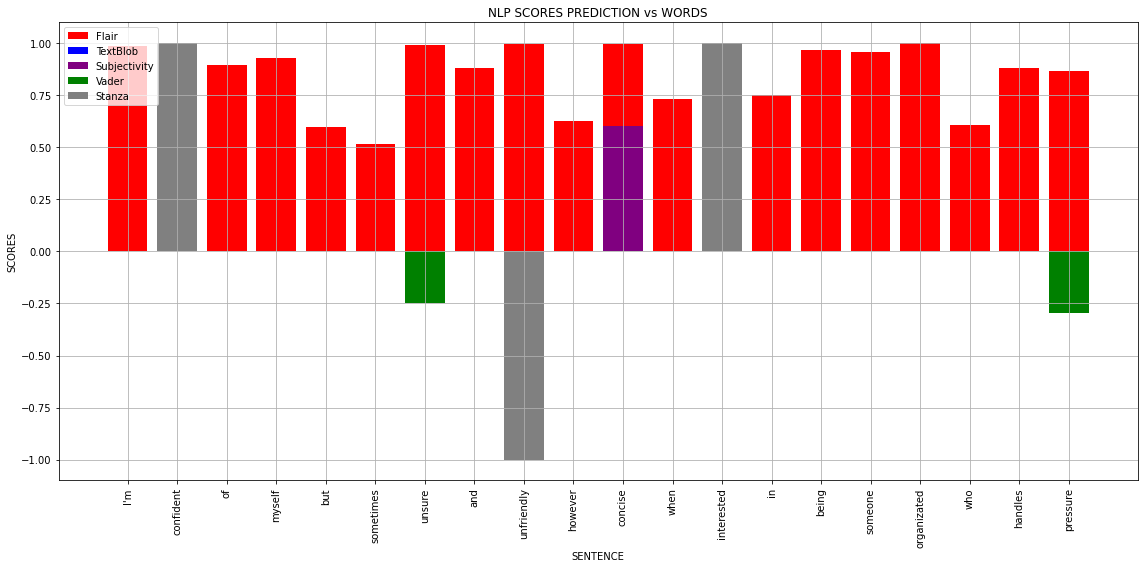

In [ ]:
plot_bar(
    p1y=y_flair,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    p5y=y_stanza,
    x=x_plots,
    size=(16,  8)
)

## **Plotting lines**

In [ ]:
def plot_lines(p1y, p2y, p3y, p4y, p5y, x, size):
    plt.figure(figsize=size)
    plt.plot(x, p1y, linestyle='solid', color='red', label='Flair')
    plt.plot(x, p2y, linestyle='solid', color='blue', label='TextBlob')
    plt.plot(x, p3y, linestyle='dashed', color='purple', label='Subjectivity')
    plt.plot(x, p4y, linestyle='solid', color='green', label='Vader')
    plt.plot(x, p5y, linestyle='solid', color='black', label='Stanza')
    plt.title('NLP SCORES PREDICTION vs WORDS')
    plt.xlabel('SENTENCE')
    plt.ylabel('SCORES')
    plt.legend()
    plt.xticks(size=10, rotation='vertical')
    plt.yticks(size=10)
    plt.grid(True)
    
    plt.show()

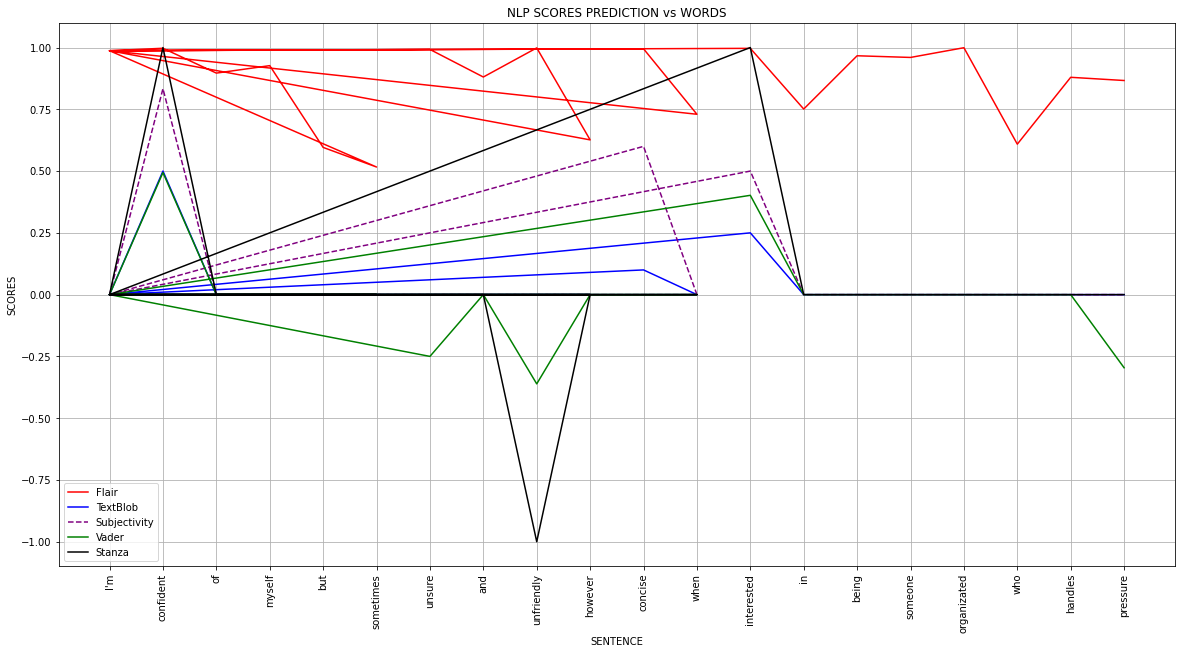

In [ ]:
plot_lines(
    p1y=y_flair,
    p2y=y_textblob_sentiment,
    p3y=y_textblob_subjectivity,
    p4y=y_vader,
    p5y=y_stanza,
    x=x_plots,
    size=(20,  10)
)

---
# **6. Brief positive conclusion**
---

1. **Flair** is great because the properties of the LSTM model
2. **TextBlob** subjectivity works great
3. **Vader** & **Stanza** are great to detect particular and intense positive or negative words

---

## To-do:
* SpaCy testing
---